In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import precision_score
import graphviz

In [2]:
# read csv file
#features = pd.read_csv("./winequality-red.csv", header=1)
features = pd.read_csv("./winequality-red.csv", sep=';')

In [3]:
features.describe() # show summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
features.shape # show number of rows and columns

(1599, 12)

In [5]:
#separate into X and Y
Y = features['quality']
X = features.drop(['quality'], axis =1) # drop quality column
print( "features = " , features.columns ) #dataframe
print( "X aka inputs = " , X.columns ) #dataframe
print( "Y aka outputs = " , Y.name ) # series

features =  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
X aka inputs =  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Y aka outputs =  quality


In [8]:
#split X, Y into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print( "X training = " , X_train.shape , " X testing = " , X_test.shape) #dataframe
print( "Y training = " , Y_train.shape , " Y testing = " , Y_test.shape) #dataframe


X training =  (1279, 11)  X testing =  (320, 11)
Y training =  (1279,)  Y testing =  (320,)


In [9]:
#Logistic Classification
LR_model = LogisticRegression() # build logistic Regression
LR_model.fit(X_train, Y_train) # train 
# After train, predict the Y values
Y_pred = LR_model.predict(X_test)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("Precision Score LR_model", precision_score(Y_test, Y_pred, average = 'micro'))

Precision Score LR_model 0.625


ValueError: operands could not be broadcast together with shapes (6,11) (1279,) 

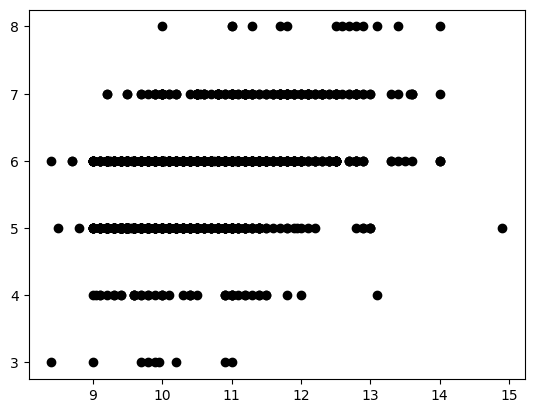

In [21]:
# Plot outputs
import matplotlib.pyplot as plt
plt.scatter(X_train['alcohol'], Y_train, color="black")
plt.plot(X_train['alcohol'], LR_model.coef_ * X_train['alcohol'] + LR_model.intercept_, '-r', color="blue", linewidth=2)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

In [22]:
KNN_model = KNeighborsClassifier(n_neighbors=20) # build the KNN model, simple classifier using K nearest neighbours
                                # for any point, predict the class using the K nearest points.
KNN_model.fit(X_train, Y_train) # train
# After train, predict the Y values
Y_pred_KNN = KNN_model.predict(X_test)

In [23]:
print("Precision Score KNN_model", precision_score(Y_test, Y_pred_KNN, average = 'micro'))

Precision Score KNN_model 0.54375


In [24]:
tree_model = tree.DecisionTreeClassifier() # build the decisionTree classifier
tree_model.fit(X_train, Y_train) # train
# After train, predict the Y values
Y_pred_tree = tree_model.predict(X_test)

In [26]:
print("Precision Score tree_model TEST", precision_score(Y_test, Y_pred_tree, average = 'micro'))

Y_pred_tree_train = tree_model.predict(X_train)
print("Precision Score tree_model TRAIN", precision_score(Y_train, Y_pred_tree_train, average = 'micro'))

Precision Score tree_model TEST 0.51875
Precision Score tree_model TRAIN 1.0


In [27]:
from sklearn.tree import export_graphviz
class_labels = ['Class_A', 'Class_B', 'Class_C', 'Class_D', 'Class_E', 'Class_F']
# export as dot file
dot_data = export_graphviz(tree_model, out_file=None, feature_names = X_train.columns, class_names = class_labels, rounded = True, proportion = False, precision = 1, filled = True)

In [28]:
# Create a graph object from the DOT string
graph = graphviz.Source(dot_data)

# Save the graph to a file (e.g., 'decision_tree.png')
# This command will save both a .dot file and the specified image file (e.g., .png)
graph.render("decision_tree", format="png", view=True)

'decision_tree.png'

In [29]:
#random forest classifier
rF_model = RandomForestClassifier(n_estimators=100) # build with 100 random trees
rF_model.fit(X_train, Y_train) # train
# After train, predict the Y values
Y_pred_rF = rF_model.predict(X_test)

In [11]:
print("Precision Score random forest model", precision_score(Y_test, Y_pred_rF, average = 'micro'))

Precision Score random forest model 0.69375
